### Import

In [8]:
# basic libraries
import os
import numpy as np
from copy import deepcopy
from tqdm import tqdm as tqdm
import time
import gc
# graphs
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# videos
import cv2
# medical images
import nibabel as nib
# optimization
import scipy.linalg
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.stats import linregress
# load and dump data
import pickle as pkl
import warnings
# remove warnings
warnings.filterwarnings('ignore')

### Utils

In [4]:
def geo_mean(iterable):
  """
  Compute geometric mean of an array
  """
  a = np.array(iterable)
  return a.prod()**(1.0/len(a))
  
def read_image_data(path, file):
  """
  Read an image from the MNI atlas
  """
  img = nib.load(os.path.join(path, file))
  data = img.get_fdata()
  return data

## Display del MNI atlas

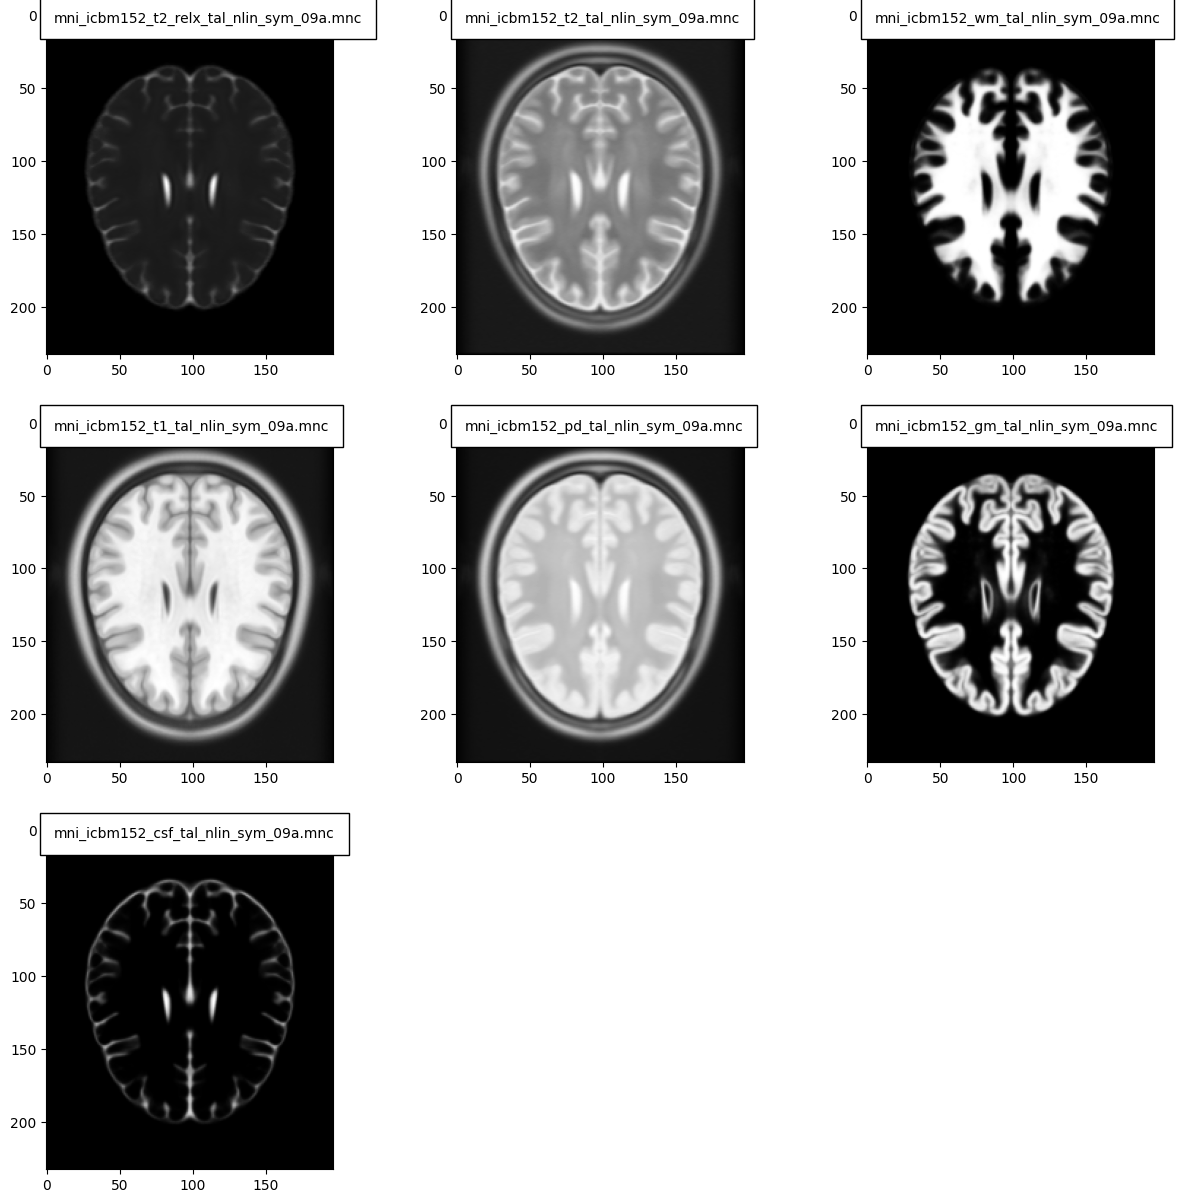

In [10]:
path = '/Users/Maxy/Desktop/tumor_growth/mni_icbm152_nlin_sym_09a_minc2'
files = ['mni_icbm152_t2_relx_tal_nlin_sym_09a.mnc',
         'mni_icbm152_t2_tal_nlin_sym_09a.mnc',
         'mni_icbm152_wm_tal_nlin_sym_09a.mnc',
         'mni_icbm152_t1_tal_nlin_sym_09a.mnc',
         'mni_icbm152_pd_tal_nlin_sym_09a.mnc',
         'mni_icbm152_gm_tal_nlin_sym_09a.mnc',
         'mni_icbm152_csf_tal_nlin_sym_09a.mnc']
f, ax = plt.subplots(3, 3, figsize=(15,15))
for i, file in enumerate(files):
  k, l = i//3, i%3
  data = read_image_data(path, file)
  ax[k, l].imshow(data[100], cmap="gray")
  ax[k, l].grid(False)
  ax[k, l].text(5, 5, file, bbox={'facecolor': 'white', 'pad': 10})
ax[-1, -2].axis('off')  
ax[-1, -1].axis('off')
f.show()